In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/Users/anchanghun/Downloads/AI_Study/dataset/iris/bezdekIris.data")


In [2]:
df.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


In [3]:

new_columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

d = df.values.tolist()
de = df.columns.tolist()
d= np.vstack((d,de))


# 새로운 데이터프레임을 생성
df = pd.DataFrame(d, columns=new_columns)


In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df_encoded = pd.get_dummies(df, columns=['class'], dtype=int)


In [6]:
df_encoded.head()

,sepal length,sepal width,petal length,petal width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,4.9,3.0,1.4,0.2,1,0,0
1,4.7,3.2,1.3,0.2,1,0,0
2,4.6,3.1,1.5,0.2,1,0,0
3,5.0,3.6,1.4,0.2,1,0,0
4,5.4,3.9,1.7,0.4,1,0,0


In [7]:
df_encoded.dtypes

sepal length             object
sepal width              object
petal length             object
petal width              object
class_Iris-setosa         int64
class_Iris-versicolor     int64
class_Iris-virginica      int64
dtype: object

In [8]:
df.dtypes

sepal length    object
sepal width     object
petal length    object
petal width     object
class           object
dtype: object

In [9]:
# object형식 float로 변경
df['sepal length'] = df['sepal length'].astype(float)
df['sepal width'] = df['sepal width'].astype(float)
df['petal length'] = df['petal length'].astype(float)
df['petal width'] = df['petal width'].astype(float)

In [10]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

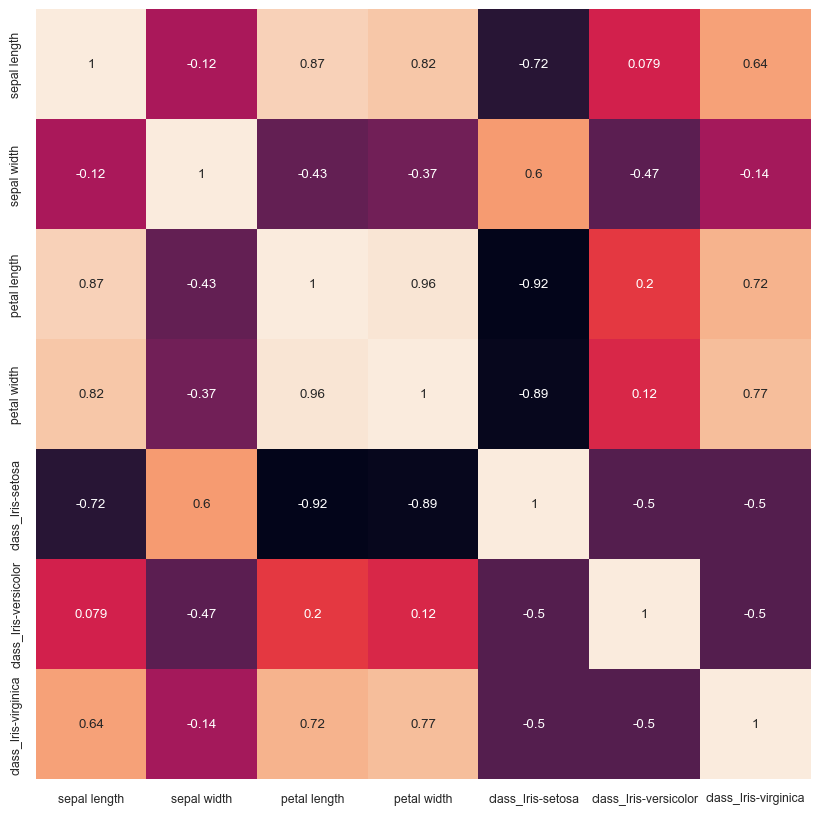

In [11]:
import matplotlib.pyplot as plt
df_corr=df_encoded.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.drop('class',axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [15]:
y = df['class']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [16]:
Y = pd.get_dummies(y).values

In [17]:
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [18]:
X = X.values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((120, 4), (120, 3), (30, 4), (30, 3))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(4,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1271 (4.96 KB)
Trainable params: 1271 (4.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3309 - mse: 0.3309 - val_loss: 0.2249 - val_mse: 0.2249
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2231 - mse: 0.2231 - val_loss: 0.2225 - val_mse: 0.2225
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.2224 - val_mse: 0.2224
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.2225 - val_mse: 0.2225
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.2224 - val_mse: 0.2224
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.2223 - val_mse: 0.2223
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.2224 - val_mse: 0.2224
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 

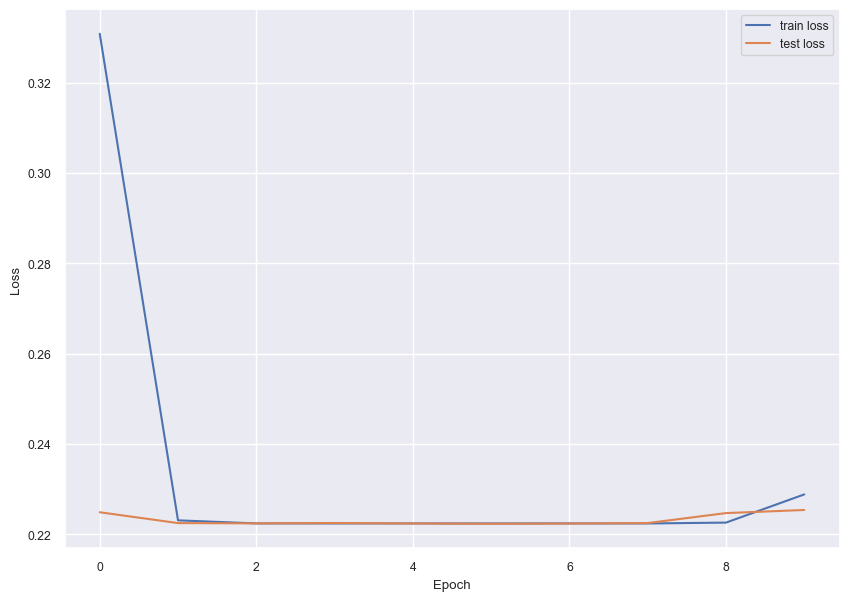

In [23]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 10ms/step - loss: 0.2254 - mse: 0.2254


[0.22538141906261444, 0.22538141906261444]